In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt


# 1. Cargar los archivos CSV y unificarlos
df1 = pd.read_csv('E:/SeusDev/Downloads/PruebaTécnicaAnalistaDeDatos/PruebaTécnicaAnalistaDeDatos/cervezas_parte1.csv')
df2 = pd.read_csv('E:/SeusDev/Downloads/PruebaTécnicaAnalistaDeDatos/PruebaTécnicaAnalistaDeDatos/cervezas_parte2.csv')

# Unificar los dataframes a través de la columna [C.Cli]
df = pd.merge(df1, df2, on='C.Cli', how='outer')
print(df.info())

# 2. Mostrar estadísticas para columnas numéricas
numerical_stats = df.describe()
print("Estadísticas numéricas:")
print(numerical_stats)

# 3. Para columnas categóricas
categorical_stats = df.select_dtypes(include=['object']).describe()
print("Estadísticas categóricas:")
for col in categorical_stats.columns:
    mode = df[col].mode()[0]
    null_count = df[col].isnull().sum()
    non_null_count = df[col].notnull().sum()
    print(f"Columna: {col} | Moda: {mode} | Nulos: {null_count} | No Nulos: {non_null_count}")

# 4. Eliminar registros con ventas de cajas mayores a 10
df_filtered = df[df['#Cj Vta Bruta SUM'] <= 10]

# 5. Gráfica de variación de ventas por tipos o divisiones (D.Div)
plt.figure(figsize=(10, 6))
df_filtered.boxplot(column='#Cj Vta Bruta SUM', by='D.Div')
plt.title('Variación de Ventas por Tipos de Cerveza')
plt.suptitle('')
plt.xlabel('Tipo de Cerveza')
plt.ylabel('Ventas de Cajas')
plt.xticks(rotation=45)
plt.show()


In [ ]:
pip install matplotlib.pyplot

Información del DataFrame 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356284 entries, 0 to 356283
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   C.Cli              356284 non-null  int64  
 1   D.Mar              356284 non-null  object 
 2   #Cj Vta Bruta SUM  356284 non-null  float64
 3   #Cj Vta Neta SUM   356284 non-null  float64
 4   #HL Vta Bruta SUM  356284 non-null  float64
 5   #HL Vta Neta SUM   356284 non-null  float64
 6   $ Fact SUM         356284 non-null  float64
 7   $ Neto SUM         356284 non-null  float64
 8   D.Seg.VTA          356284 non-null  object 
 9   D.Seg.Mkt          356284 non-null  object 
 10  D.Can.MKT          356284 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 29.9+ MB
None

Información del DataFrame 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356284 entries, 0 to 356283
Data columns (total 13 columns):
 #   Column   

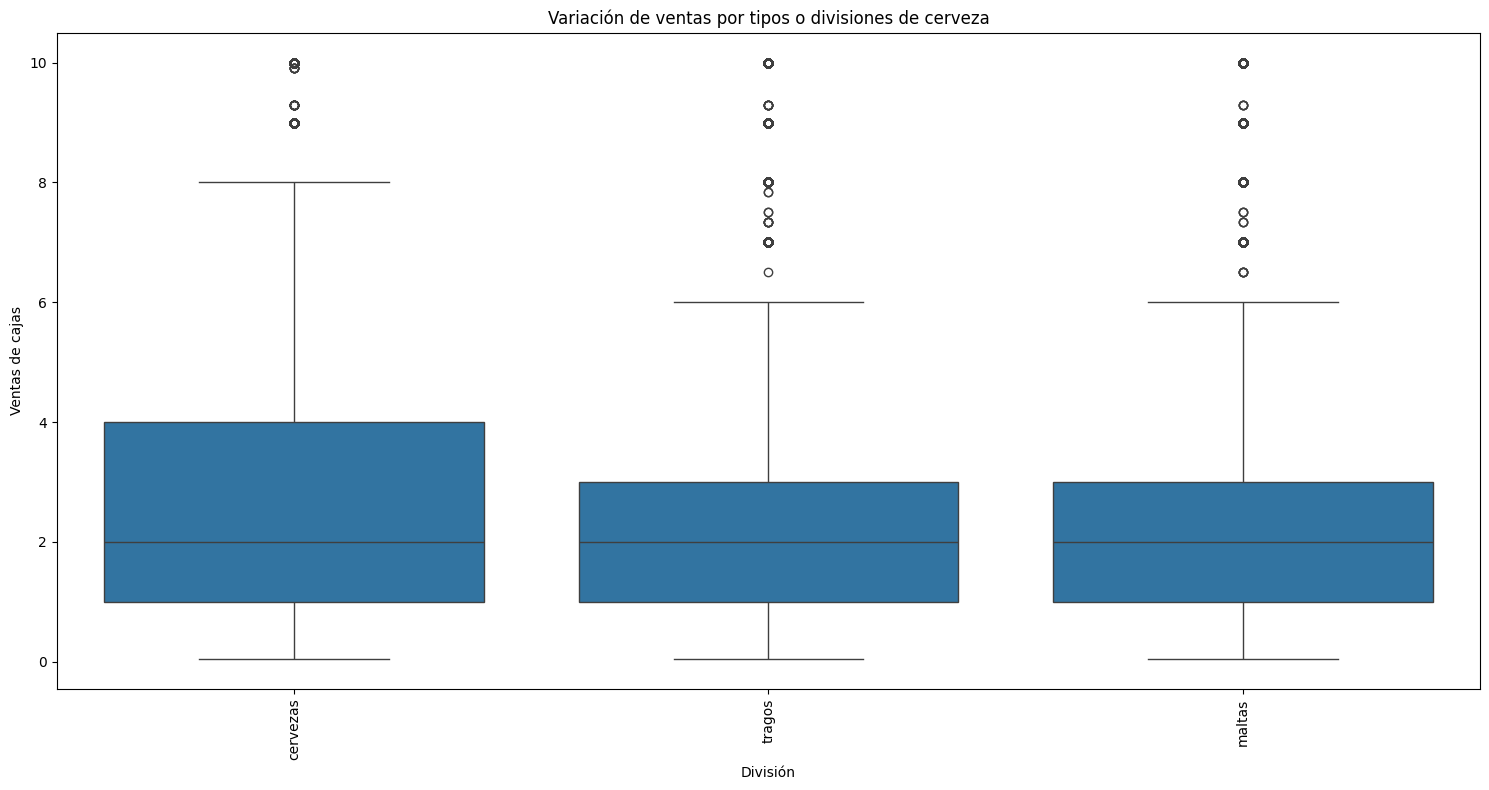


Análisis completo. Revisa los resultados y gráficos generados.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Cargar y unificar los archivos CSV
def cargar_y_unificar_datos():
    df1 = pd.read_csv('E:/SeusDev/Downloads/PruebaTécnicaAnalistaDeDatos/PruebaTécnicaAnalistaDeDatos/cervezas_parte1.csv', low_memory=False)
    df2 = pd.read_csv('E:/SeusDev/Downloads/PruebaTécnicaAnalistaDeDatos/PruebaTécnicaAnalistaDeDatos/cervezas_parte2.csv', low_memory=False)


    print("Información del DataFrame 1:")
    print(df1.info())
    print("\nInformación del DataFrame 2:")
    print(df2.info())
    
    # Verificar columnas comunes
    columnas_comunes = set(df1.columns) & set(df2.columns)
    print(f"\nColumnas comunes: {columnas_comunes}")
    
    # Unificar los DataFrames
    df = pd.merge(df1, df2, on='C.Cli', how='outer', suffixes=('_1', '_2'))
    
    # Manejar columnas duplicadas
    for col in df.columns:
        if col.endswith('_1') and col[:-2] in df.columns:
            df[col[:-2]] = df[col[:-2]].fillna(df[col])
            df = df.drop(columns=[col])
        elif col.endswith('_2') and col[:-2] in df.columns:
            df[col[:-2]] = df[col[:-2]].fillna(df[col])
            df = df.drop(columns=[col])
    
    print("\nInformación del DataFrame unificado:")
    print(df.info())
    
    return df

# 2. Análisis de columnas numéricas
def analizar_columnas_numericas(df):
    columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
    estadisticas_numericas = df[columnas_numericas].agg(['max', 'min', 'mean', 'median'])
    print("\nEstadísticas de columnas numéricas:")
    print(estadisticas_numericas)
    return estadisticas_numericas

# 3. Análisis de columnas categóricas
def analizar_columnas_categoricas(df):
    columnas_categoricas = df.select_dtypes(include=['object']).columns
    estadisticas_categoricas = pd.DataFrame(index=columnas_categoricas, columns=['Moda', 'Nulos', 'No Nulos', 'Valores Únicos'])
    
    for col in columnas_categoricas:
        estadisticas_categoricas.loc[col, 'Moda'] = df[col].mode().values[0] if not df[col].mode().empty else 'No hay moda'
        estadisticas_categoricas.loc[col, 'Nulos'] = df[col].isnull().sum()
        estadisticas_categoricas.loc[col, 'No Nulos'] = df[col].notnull().sum()
        estadisticas_categoricas.loc[col, 'Valores Únicos'] = df[col].nunique()
    
    print("\nEstadísticas de columnas categóricas:")
    print(estadisticas_categoricas)
    return estadisticas_categoricas

# 4. Filtrar registros
def filtrar_registros(df):
    df_filtrado = df[df['#Cj Vta Bruta SUM'] <= 10]
    print(f"\nRegistros originales: {len(df)}")
    print(f"Registros después del filtrado: {len(df_filtrado)}")
    return df_filtrado

# 5. Gráfico de caja de bigotes
def graficar_ventas_por_division(df):
    plt.figure(figsize=(15, 8))
    sns.boxplot(x='D.Div', y='#Cj Vta Bruta SUM', data=df)
    plt.title('Variación de ventas por tipos o divisiones de cerveza')
    plt.xlabel('División')
    plt.ylabel('Ventas de cajas')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Ejecución principal
if __name__ == "__main__":
    # Cargar y unificar datos
    df = cargar_y_unificar_datos()
    
    # Analizar columnas numéricas
    estadisticas_numericas = analizar_columnas_numericas(df)
    
    # Analizar columnas categóricas
    estadisticas_categoricas = analizar_columnas_categoricas(df)
    
    # Filtrar registros
    df_filtrado = filtrar_registros(df)
    
    # Graficar
    graficar_ventas_por_division(df_filtrado)
    
    print("\nAnálisis completo. Revisa los resultados y gráficos generados.")